In [ ]:
'''
Module 10 - Exception Handling and Memory Management
Assignment - Files Handling
3 April
'''

In [27]:
# writing to a file>> file1.txt
with open("file1.txt" , "w") as f:
    f.write("Hello\n")
    f.write("This is my first file named as file1\n")

Q1. Write a code to read the contents of a file in Python.

In [28]:
try:
    with open("file1.txt" , "r") as f:
        print("File opened successfully.")
        w=f.read()
        print("Contents of the file:") 
        print(w)
except FileNotFoundError:
    print("File Not Found.")
except Exception as e:
    print("An error occurred :" , e)

File opened successfully.
Contents of the file:
Hello
This is my first file named as file1



Q2. Write a code to write to a file in Python

In [23]:
with open("file2.txt" , "w") as f:
    f.write("Hello\n")
    f.write("This is my second file named as file2")

In [24]:
# reading the content of above file>> file2.txt
with open("file2.txt" , "r") as f:
    r = f.read()
    print(r)

Hello
This is my second file named as file2


Q3. Write a code to append to a file in Python.

In [29]:
try:
    with open("file1.txt" , "a") as f:
        f.write("I am adding another line in existing file\n")
        f.write("this is another line in 1st file named as file1.txt")
except FileNotFoundError:
    print("File not found")
except Exception as e:
    print("An error occurred :" , e)

In [30]:
# reading the content of above file>> file1.txt
with open("file1.txt" , "r") as f:
    r = f.read()
    print(r)

Hello
This is my first file named as file1
I am adding another line in existing file
this is another line in 1st file named as file1.txt


Q4. Write a code to read a binary file in Python.

In [31]:
# binary files 

with open("file_bin.bin" , "wb") as f:
    f.write(b"\x48\x65\x6c\x6c\x6f\x2c\x20\x57\x6f\x72\x6c\x64\x21")

In [32]:
# to read the content of above binary file 

with open("file_bin.bin" , "rb") as f:
    print(f.read())
    

b'Hello, World!'


Q5. What happens if we don't use ”with” keyword with ”open” in python?

In [ ]:
"""
If we don't use the with keyword with open in Python, we have to manage the file's open and close operations manually.
This means we'll have to explicitly close the file after we're done with it.
Failing to do so may lead to issues such as resource leaks, 
where the file remains open and consumes system resources unnecessarily.
"""
# Example:

file = open("example.txt", "r")
try:
    # Perform operations with the file
    content = file.read()
    print(content)
finally:
    # Close the file
    file.close()  # We explicitly close the file using the close() method in a finally block, ensuring that it's closed regardless of whether an exception occurs.


with open("example.txt", "r") as file:
    content = file.read()
    print(content)  #In this version, the file is automatically closed when the with block exits, whether due to normal execution or an exception. This makes the code cleaner and reduces the risk of resource leaks.


Q6. Explain the concept of buffering in file handling and how it helps in improving read and write operations.

In [ ]:
"""
Buffering is a technique used in file handling to improve the efficiency of read and write operations
by reducing the number of interactions with the underlying file system.

When you perform read or write operations on a file, the data is typically transferred
between your program and the physical storage device, such as a hard disk or solid-state drive.
Each interaction with the file system involves some overhead, including disk I/O operations,
which can be relatively slow compared to in-memory operations.

Buffering involves temporarily storing data in a memory buffer before it's written to or read from the file.
Instead of immediately writing or reading small chunks of data directly to or from the file,
the data is accumulated in the buffer until it reaches a certain size or until a specific condition triggers a flush operation.

Here's how buffering helps in improving read and write operations:

1)Reduced Disk I/O Operations: By accumulating data in a buffer before writing it to the file,
                               multiple smaller write operations can be combined into a single larger write operation. 
                               This reduces the number of disk I/O operations, which can significantly improve performance,
                               especially for large files or when dealing with slow storage devices.
2)Optimized System Calls:      Buffering reduces the frequency of system calls required to read from or write to the file.
                               Instead of making a system call for each individual read or write operation,
                               multiple operations can be batched together and performed in a single system call, reducing overhead.
3)Improved Throughput:         Buffering allows your program to continue executing while data is being read from
                               or written to the file asynchronously in the background.
                               This overlap of computation and I/O operations can lead to improved overall throughput
                               and responsiveness of your program.
4)Minimized Locking Overhead:  When multiple processes or threads are accessing the same file concurrently, 
                               buffering can help reduce contention and locking overhead by allowing each process
                               or thread to operate on its own buffer independently.
"""



Q7. Describe the steps involved in implementing buffered file handling in a programming language of your choice.

In [40]:
"""
1)Open the File:               Use the open() function to open the file in the desired mode (read, write, or append).
                               You can specify the buffering behavior by passing the buffering parameter,
                               which determines how data is buffered during read and write operations.
2)Perform File Operations:     Read from or write to the file as needed.
                               Python's file objects provide methods like read(), write(), readline(), etc.,
                               for performing file operations. Data is accumulated in the buffer 
                               instead of immediately being written to or read from the file.
3)Flush the Buffer (Optional): Depending on the buffering mode, the buffer may be automatically flushed
                               under certain conditions (e.g., when it's full or when the file is closed). 
                               However, you can manually flush the buffer using the flush() method to ensure that
                               any pending data is written to the file immediately.
4)Close the File:              When you're done with the file, close it using the close() method.
                               This will ensure that any remaining data in the buffer is flushed to the file
                               and that system resources associated with the file are released properly.
"""

# Example:

# Open the file with buffering enabled (default buffer size)
with open("buff_example.txt", "w") as file:
    # Write data to the file (data is buffered)
    file.write("Hello, World!\n")
    file.write("This is a buffered file handling example.\n")
    # No need to flush the buffer explicitly; it will be flushed when the file is closed
    
# Open the file again for reading (buffering disabled)
with open("buff_example.txt", "r", buffering=0) as file:
    # Read data from the file (data is not buffered)
    contents = file.read()
    print("File contents:", contents)
    
# Open the file again with a larger buffer size
with open("buff_example.txt", "a", buffering=8192) as file:
    # Append data to the file (data is buffered with a larger buffer size)
    file.write("Appending more data to the file.\n")
    # Flush the buffer explicitly to ensure data is written immediately
    file.flush()
    

Q8. Write a Python function to read a text file using buffered reading and return its contents.

In [43]:
try:
    buffer_size = 8192  # Set the buffer size (optional)

    with open("file2.txt", 'r', buffering=buffer_size) as file:
        contents = file.read()

    print("File contents:")
    print(contents)

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("An error occurred:", e)


File contents:
Hello
This is my second file named as file2


Q9. What are the advantages of using buffered reading over direct file reading in Python?

In [ ]:
"""
1)Improved Performance: Buffered reading reduces the number of interactions with the underlying file system
                        by accumulating data in memory before performing I/O operations.
                        This can lead to significant performance improvements,
                         especially when reading large files or performing frequent read operations.
2)Reduced System Calls: Buffered reading minimizes the frequency of system calls required to read data from the file.
                        Instead of making a system call for each individual read operation,
                        data is read in larger chunks, reducing the overhead associated with system calls.
3)Optimized Disk I/O:   Buffering allows multiple smaller read operations to be combined into a single larger read operation,
                        optimizing disk I/O by reducing the number of read requests sent to the storage device.
                        This can result in more efficient utilization of disk bandwidth and reduced latency.
4)Improved Throughput:  Buffered reading enables overlapping of I/O operations with other computations,
                        leading to improved overall throughput and responsiveness of the program.
                        While data is being read from the file asynchronously in the background,
                        the program can continue executing other tasks.
5)Control Over Buffering Parameters: Python provides flexibility in controlling buffering parameters
                                     such as buffer size and buffering mode (buffering parameter in the open() function).
                                     This allows developers to fine-tune the buffering behavior based on
                                     their specific requirements and performance considerations.
6)Reduced Locking Overhead:          Buffered reading can help reduce contention and locking overhead when
                                     multiple processes or threads are accessing the same file concurrently.
                                     Each process or thread can operate on its own buffer independently,
                                     minimizing the need for synchronization mechanisms.

Overall, buffered reading offers performance improvements, reduced system overhead,
and increased flexibility compared to direct file reading in Python.
It's a fundamental optimization technique that can significantly enhance the efficiency
of file I/O operations in various applications.
"""

Q10. Write a Python code snippet to append content to a file using buffered writing

In [1]:
try:
    # Open the file in append mode with buffered writing
    with open("file2.txt" , "a" , buffering = 8192) as f:
        # Write the content to the file
        f.write("This is the new content to append to the file.\n")
        
    print("Content appended to the file successfully.")
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("An error occurred:", e)

Content appended to the file successfully.


Q11. Write a Python function that demonstrates the use of close() method on a file.

In [1]:
try:
    file = open("file3.txt" , "w")
    
     # Write content to the file
    file.write("Hello\n")
    file.write("this is my 3rd file\n ")
    print("Content written to the file successfully.")
    
     # Close the file
    file.close()
    print("File closed.")

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("An error occurred:", e)
    
    

Content written to the file successfully.
File closed.


Q12. Create a Python function to showcase the detach() method on a file object.

In [2]:
"""
The detach() method in Python is used to detach the underlying raw stream from the TextIOBase (text-mode)
or BufferedIOBase (binary-mode) file object. This allows you to replace the file object's underlying stream with another stream.
This can be useful in scenarios where you want to continue using the file object with a different stream,
such as a different file or a custom stream.

"""

# Example:

try:
    # Open the file in read mode
    with open("file3.txt" , "r") as file:
        # Detach the file object's underlying raw stream
        raw_stream = file.detach()

    # Print the detached raw stream
    print("Raw stream detached from the file object:", raw_stream)

    # we can now use the raw stream as needed
    # For example, we can pass it to another file object or use it directly

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("An error occurred:", e)


An error occurred: underlying buffer has been detached


Q13.  Write a Python function to demonstrates the use of seek() method to change the file position. 

In [5]:
try:
    # Open the file in read mode
    with open("file3.txt", 'r') as file:
        # Read and print the content of the first 10 characters
        content_part1 = file.read(10)
        print("Content part 1:", content_part1)

        # Use seek() to change the file position 
        file.seek(11)

        # Read and print the content of the next characters
        content_part2 = file.read(15)
        print("Content part 2:", content_part2)

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("An error occurred:", e)


Content part 1: Hello
this
Content part 2: is my 3rd file



Q14. Create a python function to return the file descriptor (integer number) of a file using the fileno() method.

In [6]:
def get_file_descriptor(file_obj):
    """
    Returns the file descriptor of a file.

    Args:
    file_obj (file object): The file object whose file descriptor is to be retrieved.

    Returns:
    int: The file descriptor of the file.
    """
    return file_obj.fileno()

  # Example usage:
  # Open a file
file = open("file3.txt", "r")
  # Get the file descriptor
fd = get_file_descriptor(file)
print("File Descriptor:", fd)
  # close the file when done
file.close()


File Descriptor: 64


Q15. Write a Python function to return the current position of the file's object using the tell() method.

In [7]:
def get_current_position(file_obj):
    """
    Returns the current position of the file's object.

    Args:
    file_obj (file object): The file object whose current position is to be retrieved.

    Returns:
    int: The current position of the file's object.
    """
    return file_obj.tell()

  # Example usage:
  # Open a file
file = open("file3.txt", "r")
  # Get the current position
position = get_current_position(file)
print("Current Position:", position)
  #close the file when done
file.close()


Current Position: 0


Q16. Create a python program that logs a message to a file using the logging module.

In [8]:
import logging

# Configure logging to write messages to a file
logging.basicConfig(filename='student.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade

    def display_info(self):
        info = f"Name: {self.name}, Age: {self.age}, Grade: {self.grade}"
        print(info)
        logging.info(info)

# Example usage
if __name__ == "__main__":
    # Create a Student object
    student1 = Student("John", 18, "A")

    # Display student information and log it
    student1.display_info()


Name: John, Age: 18, Grade: A


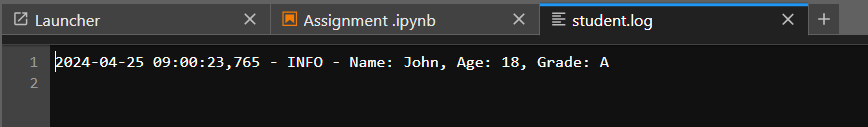

Q17. Explain the importance of logging levels in Python's logging module.

In [ ]:
"""
The importance of logging levels in Python's logging module lies in their ability to provide a
structured approach to managing and filtering log messages based on their severity or significance.
Here are some key reasons why logging levels are important:

1)Granular Control: Logging levels allow developers to categorize log messages based on their severity,
                    ranging from the most severe (critical errors) to the least severe (debugging information).
                    This provides granular control over what types of messages are emitted by the application.
2)Clarity and Readability: By using appropriate logging levels, log messages convey the severity of the event being logged.
                           This makes logs more readable and helps developers quickly identify and prioritize issues
                           during troubleshooting.
3)Filtering and Scalability: Logging levels enable filtering of log messages based on severity levels.
                             This is particularly useful in large-scale applications where a high volume of log messages is generated.
                             Developers can configure the logging system to only display messages of a certain severity level or higher,
                             reducing noise and focusing on relevant information.
4)Debugging and Maintenance: During development and debugging, developers can use different logging levels
                             to provide varying levels of detail about the application's behavior.
                             They can start with more verbose logging during development
                             and then dial it back to less detailed logging in production to minimize performance overhead.
5)Error Reporting and Monitoring: Different logging levels facilitate different actions in response to logged events.
                                  For example, critical errors might trigger immediate notifications to system administrators,
                                  while less severe errors might be logged for later analysis.
                                  
Python's logging module provides several built-in logging levels, including
DEBUG,
INFO,
WARNING,
ERROR, and
CRITICAL,
each representing a different severity level.
Developers can use these levels to tailor the logging behavior of their applications according to their specific requirements.

"""


Q18. Create a python program that uses the debugger to find the value of a variable inside a loop.

In [1]:
import logging

# Configure logging
logging.basicConfig(filename='debug_var.log', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

def calculate_sum(n):
    total = 0
    for i in range(1, n+1):
        total += i
        logging.debug("Value of total at iteration %d: %d", i, total)
    return total

# Call the function and pass a value for 'n'
result = calculate_sum(5)
print("Result:", result)


Result: 15


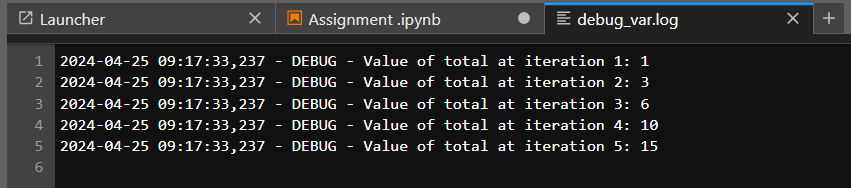

Q19. Create a Python program that demonstrates setting breakpoints and inspecting variables using the debugger


In [2]:
import pdb

def calculate_sum(a, b):
    total = a + b
    pdb.set_trace()  # Set a breakpoint here
    return total

def main():
    x = 5
    y = 7
    result = calculate_sum(x, y)
    print("Result:", result)

if __name__ == "__main__":
    main()


> /tmp/ipykernel_1648/2598217149.py(6)calculate_sum()
      4     total = a + b
      5     pdb.set_trace()  # Set a breakpoint here
----> 6     return total
      7 
      8 def main():



ipdb>  px


*** NameError: name 'px' is not defined


ipdb>  p x


*** NameError: name 'x' is not defined


ipdb>  x


*** NameError: name 'x' is not defined


ipdb>  c


Result: 12


Q20. Create a Python program that uses the debugger to trace a recursive function.

In [1]:
import pdb

def factorial(n):
    pdb.set_trace()  # Set a breakpoint, When the program execution reaches this line, it will pause and enter into the debugger mode.
    if n == 0:  # We check if n is equal to 0. If it is, we return 1 (base case of the factorial function).
        return 1
    else:
        return n * factorial(n-1)
  # we specify the number for which we want to calculate the factorial (in this case, num = 5), and then call the factorial function with that number.
if __name__ == "__main__": 
    num = 5
    print("Factorial of", num, "is", factorial(num))
    
    
# When we run this program, it will stop at each recursive call,
# allowing us to examine the variables and step through the code using debugger commands
# like n (next line), s (step into function), c (continue), etc.


> /tmp/ipykernel_70/678113767.py(5)factorial()
      3 def factorial(n):
      4     pdb.set_trace()  # Set a breakpoint
----> 5     if n == 0:
      6         return 1
      7     else:



ipdb>  n


> /tmp/ipykernel_70/678113767.py(8)factorial()
      6         return 1
      7     else:
----> 8         return n * factorial(n-1)
      9 
     10 if __name__ == "__main__":



ipdb>  n


> /tmp/ipykernel_70/678113767.py(5)factorial()
      3 def factorial(n):
      4     pdb.set_trace()  # Set a breakpoint
----> 5     if n == 0:
      6         return 1
      7     else:



ipdb>  n


> /tmp/ipykernel_70/678113767.py(8)factorial()
      6         return 1
      7     else:
----> 8         return n * factorial(n-1)
      9 
     10 if __name__ == "__main__":



ipdb>  n


> /tmp/ipykernel_70/678113767.py(5)factorial()
      3 def factorial(n):
      4     pdb.set_trace()  # Set a breakpoint
----> 5     if n == 0:
      6         return 1
      7     else:



ipdb>  c


> /tmp/ipykernel_70/678113767.py(5)factorial()
      3 def factorial(n):
      4     pdb.set_trace()  # Set a breakpoint
----> 5     if n == 0:
      6         return 1
      7     else:



ipdb>  c


> /tmp/ipykernel_70/678113767.py(5)factorial()
      3 def factorial(n):
      4     pdb.set_trace()  # Set a breakpoint
----> 5     if n == 0:
      6         return 1
      7     else:



ipdb>  c


> /tmp/ipykernel_70/678113767.py(5)factorial()
      3 def factorial(n):
      4     pdb.set_trace()  # Set a breakpoint
----> 5     if n == 0:
      6         return 1
      7     else:



ipdb>  c


Factorial of 5 is 120


Q21. Write a try-except block to handle a ZeroDivisionError

In [2]:
try:
    numerator = int(input("Enter the numerator: "))
    denominator = int(input("Enter the denominator: "))
    
    result = numerator / denominator
    print("Result:", result)

except ZeroDivisionError:
    print("Error: Division by zero is not allowed.")
except ValueError:
    print("Error: Please enter valid integers for numerator and denominator.")


Enter the numerator:  10
Enter the denominator:  0


Error: Division by zero is not allowed.


Q22. How does the else block work with try-except?

In [3]:
try:
    # Code that may raise an exception
    result = 10 / 2
except ZeroDivisionError:
    # Code to handle a ZeroDivisionError exception
    print("Error: Division by zero is not allowed.")
else:
    # Code to execute if no exception occurs
    print("Division was successful. Result:", result)


Division was successful. Result: 5.0


Q23. Implement a try-except-else block to open and read a file.

In [4]:
try:
    # Open the file in read mode
    with open("example.txt", "r") as file:
        # Read the contents of the file
        content = file.read()
except FileNotFoundError:
    # Handle the case where the file is not found
    print("Error: File not found.")
except IOError:
    # Handle other I/O related errors
    print("Error: Could not read the file.")
else:
    # If no exception occurs, print the content of the file
    print("File content:")
    print(content)


File content:

example 1
example 2
example 3 
example 4



Q24. What is the purpose of the finally block in exception handling.

In [5]:
"""
The finally block in exception handling serves the purpose of providing a piece of code that should always be executed,
regardless of whether an exception occurred or not.
It ensures that cleanup or finalization tasks are performed, such as closing files, releasing resources, or logging important information.
"""

# Example:

try:
    # Code that may raise an exception
    file = open("example.txt", "r")
    content = file.read()
    # Perform other operations
except FileNotFoundError:
    # Handle the case where the file is not found
    print("Error: File not found.")
except IOError:
    # Handle other I/O related errors
    print("Error: Could not read the file.")
else:
    # If no exception occurs, print the content of the file
    print("File content:")
    print(content)
finally:
    # Cleanup code that should always be executed
    if 'file' in locals():
        file.close()


File content:

example 1
example 2
example 3 
example 4



Q25. Write a try-except-finally block to handle a ValueError.

In [11]:
try:
    # Code that may raise a ValueError
    num = int(input("Enter a number: "))
    result = 10 / num
    print("Result:", result)
except ValueError:
    # Handle the case where the input cannot be converted to an integer
    print("Error: Please enter a valid integer.")
except ZeroDivisionError:
    # Handle the case where division by zero occurs
    print("Error: Division by zero is not allowed.")
finally:
    # Cleanup code that should always be executed
    print("Cleanup code: This code always runs, regardless of exceptions.")


Enter a number:  y


Error: Please enter a valid integer.
Cleanup code: This code always runs, regardless of exceptions.


Q26. How multiple except blocks work in Python?

In [ ]:
"""

In Python, multiple except blocks can be used to handle different types of exceptions that may occur within a try block.
When an exception occurs, Python checks each except block sequentially
to see if the raised exception matches the type specified in the except block.
If a match is found, the corresponding except block is executed, and the program continues its execution after the try-except structure.
"""


try:
    # Attempting to open a file that does not exist
    file = open("nonexistent_file.txt", "r")

    # Performing division by zero
    result = 10 / 0

    # Accessing an index that is out of range
    my_list = [1, 2, 3]
    print(my_list[5])

except FileNotFoundError:
    print("File not found error occurred!")
except ZeroDivisionError:
    print("Error: Division by zero!")
except IndexError:
    print("Index out of range error occurred!")
except Exception as e:
    print("An unexpected error occurred:", e)


Q27. What is a custom exception in Python?

In [14]:
"""
In Python, a custom exception refers to creating your own exception class
by subclassing Python's built-in Exception class or one of its subclasses.
Custom exceptions are useful when you want to raise an exception that represents a specific error condition in your code,
which is not adequately covered by the built-in exceptions.

"""
# Example:

class CustomError(Exception):
    """Custom exception class."""
    pass
def example_function(x):
    if x < 0:
        raise CustomError("Value must be non-negative")

try:
    example_function(-5)
except CustomError as e:
    print("Caught CustomError:", e)



Caught CustomError: Value must be non-negative


Q28.Create a custom exception class with a message

In [15]:
class CustomError(Exception):
    """Custom exception class with a message."""
    
    def __init__(self, message):
        super().__init__(message)
        self.message = message

# Example usage:
try:
    raise CustomError("This is a custom error message.")
except CustomError as e:
    print("Caught CustomError:", e.message)


Caught CustomError: This is a custom error message.


Q29.Write a code to raise a custom exception in Python

In [16]:
class OutOfStockError(Exception):
    """Custom exception class for out of stock errors."""
    pass

class Product:
    def __init__(self, name, stock):
        self.name = name
        self.stock = stock
    
    def purchase(self, quantity):
        if self.stock < quantity:
            raise OutOfStockError(f"Sorry, '{self.name}' is out of stock.")
        else:
            self.stock -= quantity
            print(f"Purchase successful: {quantity} units of '{self.name}'")

# Example usage:
product = Product("Widget", 5)
try:
    product.purchase(10)
except OutOfStockError as e:
    print("Error:", e)


Error: Sorry, 'Widget' is out of stock.


Q30.Write a function that raises a custom exception when a value is negative.

In [19]:
class customException(Exception):
    pass

def value(x):
    if x<0:
        raise customException("value can't be negative")
        
try:
    x=-9
    value(x)
except customException as e:
    print("Error: ",e)

Error:  value can't be negative


Q31. What is the role of try, except, else, and finally in handling exceptions.

In [ ]:
"""
=> try block:
The try block is used to enclose the code that may raise an exception.
Python attempts to execute the code inside the try block.
If an exception occurs within the try block, Python immediately jumps out of the try block
and searches for an appropriate except block.

=> except block:
The except block follows the try block and is used to catch and handle specific exceptions that may occur within the try block.
If an exception matches the type specified in the except block, Python executes the code inside that except block.
If no matching except block is found for the raised exception, the program terminates with an error message.

=> else block:
The else block follows all except blocks (if present) and is executed only if no exceptions occur within the try block.
It is typically used to contain code that should be executed if the try block completes successfully without raising any exceptions.
If any exception occurs within the try block, the else block is skipped.

=> finally block:
The finally block follows all except and else blocks (if present) 
and is executed regardless of whether an exception occurs within the try block.
It is typically used for cleanup operations, such as closing files, releasing resources,
or finalizing operations, that should be performed whether an exception occurs or not.
The code inside the finally block will always run,
even if an exception is raised and caught, or if an exception is raised but not caught.


In summary, try is used to enclose code that may raise exceptions,
except is used to catch and handle exceptions, else is executed if no exceptions occur,
and finally is executed regardless of whether an exception occurs, providing a mechanism for cleanup operations.
Together, they provide a comprehensive way to handle exceptions and manage program flow in Python.

"""


Q32. How can custom exceptions improve code readability and maintainability?

In [ ]:
"""
1)Expressive Error Handling:         Custom exceptions allow you to define exception classes that are meaningful and expressive.
                                     By giving specific names to exceptions that reflect the nature of the error, 
                                     you make it easier for developers to understand why an exception was raised and what went wrong.
                                     This clarity can aid in debugging and troubleshooting.
2)Encapsulation of Error Conditions: Custom exceptions encapsulate error conditions within their own classes,
                                     separating error-handling logic from the main code flow. 
                                     This separation of concerns makes the code more modular and maintainable.
                                     Developers can focus on writing clean, functional code without cluttering it with error-checking logic.
3)Promotion of Intent:               Custom exceptions help to promote the intent of your code by making it clear
                                     which errors are expected and which are exceptional.
                                     By raising custom exceptions for specific error scenarios,
                                     you communicate the expected behavior of your code to other developers who may use
                                     or maintain it in the future.
4)Centralized Error Handling:        Custom exceptions enable centralized error handling,
                                     where specific types of errors can be caught and handled in a single location.
                                     This improves maintainability by consolidating error-handling logic
                                     and avoiding duplication of error-checking code throughout the codebase.
5)Consistent Error Reporting:        Custom exceptions provide a consistent way to report errors across different parts of the codebase.
                                     By defining a common set of exception classes with clear semantics,
                                     you ensure that error messages and handling behavior are uniform throughout the application,
                                     enhancing code consistency and readability.
6)Facilitation of Documentation:     Custom exceptions serve as a form of documentation for your code,
                                     conveying information about potential error conditions and how they should be handled.
                                     Well-named exception classes, along with informative docstrings,
                                     can serve as valuable documentation for developers who are working with or extending your code

"""


Q33. What is multithreading?

In [ ]:
"""
Multithreading is a programming concept that allows a single process to execute multiple tasks concurrently.
In a multithreaded program, multiple threads within the same process run concurrently, sharing the same memory space.
Each thread represents an independent flow of execution, allowing different parts of the program to perform tasks simultaneously.

Multithreading is commonly used in applications where multiple tasks need to be executed simultaneously
or where responsiveness is crucial, such as in graphical user interfaces (GUIs),
web servers, and multimedia applications.
By leveraging multithreading, developers can improve performance, responsiveness, and resource utilization in their software.

"""


Q34. Create a thread in Python

In [1]:
"""
In this example, a function thread_function() is defined, which will be executed by the thread.
Then, a Thread object is created with threading.Thread(target=thread_function),
specifying the target function for the thread. The thread is started with thread.start(),
and the main program continues to execute while the thread runs concurrently.
Finally, thread.join() is called to wait for the thread to finish executing before the main program exits.
"""

import threading
import time

# Define a function that will be executed by the thread
def thread_function():
    for i in range(5):
        print("Thread executing...")
        time.sleep(1)

# Create a thread object
thread = threading.Thread(target=thread_function)

# Start the thread
thread.start()

# Main program continues while the thread is running
for i in range(3):
    print("Main program executing...")
    time.sleep(2)

# Wait for the thread to finish
thread.join()

print("Main program and thread both finished.")


Thread executing...
Main program executing...
Thread executing...
Thread executing...Main program executing...

Thread executing...
Main program executing...
Thread executing...
Main program and thread both finished.


Q35. What is the Global Interpreter Lock (GIL) in Pythons

In [ ]:
"""
The Global Interpreter Lock (GIL) in Python is a mutex (lock) that protects access to Python objects,
preventing multiple native threads from executing Python bytecodes concurrently.
In other words, the GIL ensures that only one thread executes Python bytecode at a time, even in a multi-threaded environment.

The GIL has implications for multi-threaded Python programs:

1)Limited Parallelism: Due to the GIL, multi-threaded Python programs cannot fully utilize multiple CPU cores for CPU-bound tasks.
This is because only one thread can execute Python bytecode at a time, regardless of how many CPU cores are available.
2)I/O-Bound Tasks: The GIL has less impact on I/O-bound tasks, such as network operations or file I/O,
because the GIL is released when threads are waiting for external I/O operations to complete.
Therefore, in I/O-bound scenarios, multiple threads can still make progress concurrently.
3)Impact on CPU-Bound Tasks: CPU-bound tasks, on the other hand, can be significantly affected by the GIL.
In such cases, using multiple threads may not result in improved performance due to the GIL serialization.
4)Thread Coordination: While the GIL prevents true parallel execution of Python bytecode,
it simplifies thread coordination by eliminating the need for explicit locks to protect access to Python objects.
This can make programming with threads in Python simpler and less error-prone in many cases.

"""


Q36. Implement a simple multithreading example

In [2]:
"""
In this example, the thread_function() is defined to take a thread_id parameter,
indicating which thread is executing. Multiple threads are then created in a loop,
each targeting the thread_function(). Each thread is started with thread.start().
The main program continues to execute while the threads are running.
Finally, the main program waits for a brief period to allow the threads to finish their execution before exiting.

"""

# Example:

import threading
import time

# Define a function that will be executed by each thread
def thread_function(thread_id):
    print(f"Thread {thread_id} started.")
    for i in range(5):
        print(f"Thread {thread_id} executing...")
        time.sleep(1)
    print(f"Thread {thread_id} finished.")

# Number of threads to create
num_threads = 3

# Create and start each thread
for i in range(num_threads):
    thread = threading.Thread(target=thread_function, args=(i+1,))
    thread.start()

# Main program continues while threads are running
print("Main program executing...")
time.sleep(7)

print("Main program finished.")


Thread 1 started.
Thread 1 executing...
Thread 2 started.
Thread 2 executing...
Thread 3 started.
Thread 3 executing...
Main program executing...
Thread 1 executing...
Thread 3 executing...
Thread 2 executing...
Thread 1 executing...
Thread 3 executing...
Thread 2 executing...
Thread 1 executing...
Thread 3 executing...
Thread 2 executing...
Thread 1 executing...
Thread 3 executing...
Thread 2 executing...
Thread 1 finished.Thread 2 finished.
Thread 3 finished.

Main program finished.


Q37. What is the purpose of the“join()“ method in threading 

In [3]:
"""
The join() method in threading is used to wait for a thread to complete its execution before continuing with the rest of the program.
When you call join() on a thread, the program will pause
and wait until that specific thread finishes its execution before proceeding further.

Here's why the join() method is useful:

1)Synchronization: It helps in synchronizing the execution of threads.
                   By using join(), you can ensure that certain parts of your program don't proceed until
                   all the threads have completed their tasks.
2)Main Thread Management: In many cases, especially in the main program, you want to ensure that
                          all spawned threads complete their tasks before the program terminates.
                          join() helps in achieving this by making the main thread wait for all other threads to finish.
3)Resource Cleanup: If threads are performing tasks that require resource cleanup or finalization,
                    such as closing files or releasing locks, you can use join() to ensure that
                    these tasks are completed before the program exits.
"""
#Example:

import threading
import time

def thread_function():
    print("Thread started.")
    time.sleep(2)
    print("Thread finished.")

# Create a thread
thread = threading.Thread(target=thread_function)

# Start the thread
thread.start()

# Main program continues while the thread is running
print("Main program executing...")

# Wait for the thread to finish
thread.join()

print("Main program and thread both finished.")



Thread started.
Main program executing...
Thread finished.
Main program and thread both finished.


Q38.Describe a scenario where multithreading would be beneficial in pyhton

In [ ]:
"""
Web Scraping Application:

Imagine you're building a web scraping application that needs to fetch data from multiple websites simultaneously.
Each website may have different response times, and waiting for one request to finish
before making the next one could significantly slow down your application's overall performance.

In this scenario, you can utilize multithreading to improve efficiency.
You can create a separate thread for each website you want to scrape data from.
Each thread would independently make HTTP requests and process the responses.
By doing this concurrently, your application can utilize the idle time while
waiting for responses from one website to make requests to other websites.
"""
# Example:

import threading
import requests

# Function to fetch data from a website
def fetch_data(url):
    response = requests.get(url)
    print(f"Fetched data from {url}: {response.text}")

# List of URLs to scrape
urls = [
    "https://example.com/page1",
    "https://example.com/page2",
    "https://example.com/page3",
    # Add more URLs as needed
]

# Create and start a thread for each URL
threads = []
for url in urls:
    thread = threading.Thread(target=fetch_data, args=(url,))
    thread.start()
    threads.append(thread)

# Wait for all threads to finish
for thread in threads:
    thread.join()

print("All threads finished scraping.")


# In this example, each URL is scraped in its own thread, allowing multiple requests to be made concurrently. 
# This can significantly speed up the overall data retrieval process compared to making requests sequentially.
# However, it's essential to be mindful of server limits and concurrency restrictions to avoid overloading the websites you're scraping.


Q39. What is multiprocessing in python

In [4]:
"""
Multiprocessing in Python refers to the ability to run multiple processes concurrently,
leveraging the multiple CPU cores available on modern computers.
Unlike multithreading, where multiple threads share the same memory space within a single process,
multiprocessing involves separate memory space for each process.

The Python standard library provides the multiprocessing module,
which allows developers to create and manage multiple processes easily.
Each process has its own memory space, global variables, and resources, making it suitable for CPU-bound tasks and parallel computing.
"""
# Example:

import multiprocessing

# Function to calculate square
def calculate_square(number):
    return number * number

if __name__ == "__main__":
    # Create a pool of processes
    pool = multiprocessing.Pool()

    # List of numbers
    numbers = [1, 2, 3, 4, 5]

    # Map the function to the list of numbers to calculate squares concurrently
    results = pool.map(calculate_square, numbers)

    # Close the pool
    pool.close()
    pool.join()

    print("Results:", results)

# In this example, a pool of processes is created using multiprocessing.Pool().
# The map() function is then used to apply the calculate_square() function to each element in the numbers list concurrently.
# Finally, the pool is closed and joined to wait for all processes to complete before printing the results.

Results: [1, 4, 9, 16, 25]


Q40. How is multiprocessing different from multithreading in python 

In [ ]:
"""
Multiprocessing and multithreading are both techniques used to achieve concurrency in Python, but they differ in several key aspects:

Execution Model:
Multiprocessing: In multiprocessing, multiple processes run concurrently, each with its own memory space. Processes are independent of each other and communicate via inter-process communication mechanisms like pipes, queues, or shared memory.
Multithreading: In multithreading, multiple threads run within the same process and share the same memory space. Threads are lighter-weight than processes and share resources such as memory, file handles, and other process-wide state.
Global Interpreter Lock (GIL):
Multiprocessing: Multiprocessing bypasses the Global Interpreter Lock (GIL), allowing true parallel execution of CPU-bound tasks across multiple CPU cores. Each process has its own GIL, enabling parallelism without contention.
Multithreading: Multithreading in Python is subject to the Global Interpreter Lock (GIL), which prevents multiple native threads from executing Python bytecode simultaneously. As a result, multithreading is more suitable for I/O-bound tasks rather than CPU-bound tasks.
Resource Isolation:
Multiprocessing: Processes are isolated from each other, with their own memory space. This isolation ensures that if one process crashes or encounters an error, it doesn't affect other processes.
Multithreading: Threads share the same memory space within the same process. While this allows for efficient communication and data sharing, it also introduces complexities such as race conditions and requires synchronization mechanisms like locks or semaphores.
Communication:
Multiprocessing: Processes communicate using inter-process communication mechanisms such as pipes, queues, shared memory, or sockets. These mechanisms enable communication and data exchange between processes.
Multithreading: Threads share memory, allowing for direct access to shared data within the process. However, care must be taken to synchronize access to shared resources to prevent data corruption or race conditions.
Scalability:
Multiprocessing: Multiprocessing allows you to scale your applications across multiple CPU cores, making it suitable for CPU-bound tasks and parallel computing. Each process can utilize a separate CPU core, enabling better performance scaling.
Multithreading: Multithreading is suitable for I/O-bound tasks where threads spend a significant amount of time waiting for external resources such as I/O operations (e.g., network requests, file I/O). However, due to the GIL, it may not fully utilize multiple CPU cores for CPU-bound tasks.
"""


Q41. craete a process using the multiprocessing module in python

In [5]:
import multiprocessing
import os

# Function to be executed by the process
def process_function():
    print(f"Process ID: {os.getpid()}")
    print("This is a child process.")

if __name__ == "__main__":
    # Create a process
    process = multiprocessing.Process(target=process_function)

    # Start the process
    process.start()

    # Wait for the process to finish
    process.join()

    print("Main program and process both finished.")

 

"""
When we run this code, we can see that a child process is created and executes the process_function(), 
printing its process ID. After the child process finishes, the main program continues execution.
"""

Process ID: 661
This is a child process.
Main program and process both finished.


Q42.Explain the concept of Pool in the multiprocessing module. 

In [6]:
"""
In the multiprocessing module of Python, a Pool represents a pool of worker processes that can be used to execute tasks concurrently. The Pool class provides a convenient interface for parallel execution of functions across multiple processes.

Here are the key concepts related to the Pool in the multiprocessing module:

Worker Processes:
A Pool consists of a specified number of worker processes, typically corresponding to the number of CPU cores available on the system.
Each worker process in the pool is responsible for executing tasks submitted to the pool.
Task Distribution:
Tasks are distributed among the worker processes in the pool.
When a task is submitted to the pool, it's assigned to an available worker process for execution.
Concurrency:
Tasks submitted to the pool can be executed concurrently by multiple worker processes.
This allows for parallel execution of tasks, potentially improving the performance of CPU-bound operations by utilizing multiple CPU cores.
Task Submission:
Tasks can be submitted to the pool using various methods provided by the Pool class, such as apply(), apply_async(), map(), map_async(), etc.
These methods accept functions and arguments and return results asynchronously or synchronously, depending on the method used.
Result Handling:
The Pool class provides mechanisms to handle the results of executed tasks.
For asynchronous execution, results can be obtained using callback functions or by querying result objects returned by the apply_async() or map_async() methods.
For synchronous execution, results are returned immediately upon completion of tasks.
"""

# Example:

import multiprocessing

# Function to calculate square of a number
def calculate_square(number):
    return number * number

if __name__ == "__main__":
    # Create a Pool with 3 worker processes
    with multiprocessing.Pool(processes=3) as pool:
        # Perform parallel calculation of squares using map
        numbers = [1, 2, 3, 4, 5]
        results = pool.map(calculate_square, numbers)

    print("Results:", results)


Results: [1, 4, 9, 16, 25]


Q43. Explain inter-process communication in multiprocessing.

In [ ]:
"""
Inter-process communication (IPC) in multiprocessing refers to the mechanisms and techniques used for communication and data exchange between separate processes running concurrently. In Python's multiprocessing module, various IPC mechanisms are provided to facilitate communication between processes. Here are some common IPC mechanisms used in multiprocessing:

Pipes:
Pipes provide a two-way communication channel between two processes.
In Python's multiprocessing module, the Pipe() function can be used to create a pair of connection objects representing the ends of a pipe.
Each connection object (Connection) provides methods for sending and receiving data between processes.
Queues:
Queues are thread-safe data structures that allow multiple processes to communicate and exchange data.
In Python's multiprocessing module, the Queue class can be used to create shared queues that can be accessed by multiple processes.
Processes can put items into the queue using the put() method and retrieve items from the queue using the get() method.
Shared Memory:
Shared memory allows multiple processes to access a common region of memory.
In Python's multiprocessing module, the Value and Array classes can be used to create shared variables and arrays, respectively.
Processes can read from and write to shared memory locations, enabling efficient data sharing between processes.
Manager Objects:
Manager objects provide a higher-level interface for sharing data between processes.
In Python's multiprocessing module, the Manager class can be used to create shared data structures such as lists, dictionaries, and proxies.
Processes can access and modify shared data structures using proxy objects provided by the manager.
Locks, Semaphores, and Events:
Locks, semaphores, and events are synchronization primitives used to coordinate access to shared resources and ensure data consistency.
In Python's multiprocessing module, the Lock, Semaphore, and Event classes can be used to create synchronization primitives that can be shared between processes.
Processes can acquire and release locks, semaphore permits, and set or wait for event flags to control access to shared resources.

"""